In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import pickle

with open('iiitd/train_image.pkl', 'rb') as f:
    data_train = pickle.load(f)
with open('iiitd/test_image.pkl', 'rb') as f:
    data_test = pickle.load(f)
with open('iiitd/train_label.pkl', 'rb') as f:
    label = pickle.load(f)

In [4]:
im = Image.open('iiitd/Prd.AcousticRsrchGold_01_large.png')
a = np.asarray(im)

In [5]:
df=pd.DataFrame({'id':[],'label':[]})
df

,id,label


In [6]:
ids=[]
labels=[]
for i in range(8000):
    image=np.reshape(data_train[i],(28,28))
    image=np.asarray(image)
    image=image.astype(a.dtype)
    image=Image.fromarray(image)
    x="iiitd/train/"+str(i)+".png"
    ids.append(i)
    labels.append(label[i])
    image.save(x)

In [7]:
image_index=[]
for i in range(2000):
    image=np.reshape(data_test[i],(28,28))
    image=np.asarray(image)
    image=image.astype(a.dtype)
    image=Image.fromarray(image)
    x="iiitd/test/"+str(i)+".png"
    image.save(x)
    image_index.append(i)

In [8]:
df['id']=ids
df['label']=labels
df.head()

,id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [9]:
df.pivot_table(index="label", aggfunc=len).sort_values('id', ascending=False)

,id
label,
0,2000
2,2000
3,2000
6,2000


In [10]:
df.to_csv('iiitd/labels.csv',index=False)

In [11]:
# image=np.reshape(data[1],(28,28))
# print(label[7100])
# plt.imshow(image)

In [12]:
PATH = "iiitd/"
sz = 299
arch = resnet34
bs = 32

In [13]:
n=8000
val_idxs = get_cv_idxs(n)

In [14]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test', # we need to specify where the test set is if you want to submit to Kaggle competitions
                                   val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs)

In [15]:
fn = PATH + data.trn_ds.fnames[0]; fn

'iiitd/train/0.png'

In [16]:
img = PIL.Image.open(fn); img

In [17]:
img.size

(28, 28)

In [18]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

 60%|█████▉    | 119/200 [00:01<00:01, 62.47it/s, loss=0.929]


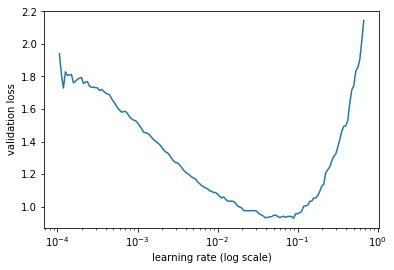

In [19]:
learn.lr_find(1e-4)
learn.sched.plot(1)

In [20]:
lr=1e-3

In [21]:
learn.fit(lr, 25)

epoch      trn_loss   val_loss   accuracy                    
    0      0.765764   0.556415   0.788125  
    1      0.655839   0.50557    0.806875                    
    2      0.607045   0.481025   0.82125                     
    3      0.566067   0.465903   0.82375                     
    4      0.551427   0.454152   0.829375                    
    5      0.521684   0.447236   0.82625                     
    6      0.514754   0.435553   0.835625                    
    7      0.519176   0.431686   0.8375                      
    8      0.512092   0.427213   0.838125                    
    9      0.491203   0.426631   0.836875                    
    10     0.493551   0.424554   0.83875                     
    11     0.47348    0.420288   0.838125                    
    12     0.45292    0.416293   0.841875                    
    13     0.476667   0.416112   0.845625                    
    14     0.441566   0.412797   0.840625                    
    15     0.462757   0.40

[0.3912947640568018, 0.85125]

In [23]:
learn.freeze_to(-4)
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.420419   0.391901   0.853125  
    1      0.413461   0.39139    0.849375                    
    2      0.391339   0.391937   0.84875                     
    3      0.402426   0.388061   0.849375                    
    4      0.401893   0.389986   0.85125                     
    5      0.419083   0.387311   0.8525                      
    6      0.393308   0.384922   0.85125                     



[0.3849218887090683, 0.85125]

In [24]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.447608   0.402339   0.845625  
    1      0.46201    0.403033   0.84625                     
    2      0.416806   0.3945     0.844375                    
    3      0.470236   0.420404   0.838125                    
    4      0.443715   0.381117   0.86                        
    5      0.374112   0.374941   0.855                       
    6      0.357513   0.374832   0.859375                    



[0.37483197659254075, 0.859375]

In [25]:
learn.fit(1e-2, 3, cycle_len=2,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.412713   0.382767   0.856875  
    1      0.366758   0.37103    0.860625                    
    2      0.40985    0.393815   0.863125                    
    3      0.403054   0.379357   0.854375                    
    4      0.339815   0.368649   0.860625                    
    5      0.328359   0.3648     0.86125                     
    6      0.390271   0.394999   0.851875                    
    7      0.375903   0.394038   0.8425                      
    8      0.363875   0.369972   0.85875                     
    9      0.3323     0.376056   0.854375                    
    10     0.316737   0.368081   0.86125                     
    11     0.304988   0.364296   0.865                       
    12     0.280128   0.363968   0.86375                     
    13     0.282186   0.363682   0.866875                    



[0.3636823496222496, 0.866875]

In [26]:
learn.save('resnet34')

In [27]:
learn.load('resnet34')

In [28]:
log_preds, _ = learn.TTA(is_test=True) 
probs = np.mean(np.exp(log_preds),0)
# accuracy_np(probs, y), metrics.log_loss(y, probs)

In [29]:
df = pd.DataFrame(probs)
df.columns = data.classes
df.insert(0, 'image_index', [o[5:-4] for o in data.test_ds.fnames])
df.shape
df.head()

,image_index,0,2,3,6
0,255,0.818000,2.320654e-03,2.231639e-04,0.179456
1,1078,0.005943,1.147137e-05,9.925799e-01,0.001465
2,1364,0.030041,2.691040e-03,6.139608e-01,0.353307
3,28,0.999721,4.648968e-07,1.013888e-07,0.000278
4,1234,0.000188,6.417063e-05,9.994146e-01,0.000333


In [30]:
cl=[]
for i in range(2000):
    temp=(max(df['0'][i],df['2'][i],df['3'][i],df['6'][i]))
    if(temp==df['0'][i]):
        cl.append(0)
    elif(temp==df['2'][i]):
        cl.append(2)
    elif(temp==df['3'][i]):
        cl.append(3)
    elif(temp==df['6'][i]):
        cl.append(6)

In [31]:
df['class']=cl

In [32]:
probs.shape

(2000, 4)

In [60]:
learn.precompute = False

In [61]:
learn.fit(1e-2, 5, cycle_len=2,cycle_mult=2)


epoch      trn_loss   val_loss   accuracy                    
    0      0.563291   0.395238   0.850625  
    1      0.491487   0.385862   0.851875                    
    2      0.519153   0.387838   0.856875                    
    3      0.507915   0.379858   0.85625                     
    4      0.448553   0.370887   0.860625                    
    5      0.471587   0.369402   0.8575                      
    6      0.499421   0.381989   0.859375                    
    7      0.47373    0.391823   0.848125                    
    8      0.484009   0.374937   0.85625                     
    9      0.453344   0.369485   0.85875                     
    10     0.437225   0.362336   0.863125                    
    11     0.446732   0.362688   0.86375                     
    12     0.431159   0.361654   0.859375                    
    13     0.427948   0.360079   0.864375                    
    14     0.486424   0.358582   0.861875                    
    15     0.474056   0.3

[0.3441350059211254, 0.8675]

In [62]:
learn.fit(1e-3, 1, cycle_len=2,cycle_mult=2)


epoch      trn_loss   val_loss   accuracy                    
    0      0.353883   0.343499   0.8625    
    1      0.382446   0.343742   0.865625                    


[0.34374193295836447, 0.865625]

In [63]:
learn.save('resnet34-2')

In [41]:
learn.load('resnet34-2')

In [64]:
log_preds, _ = learn.TTA(is_test=True) 
probs = np.mean(np.exp(log_preds),0)

In [65]:
df2 = pd.DataFrame(probs)
df2.columns = data.classes
df2.insert(0, 'image_index', [o[5:-4] for o in data.test_ds.fnames])
df2.shape
df2.head()

,image_index,0,2,3,6
0,255,0.877170,0.004030,0.006773,0.112027
1,1078,0.106239,0.002887,0.867519,0.023355
2,1364,0.191985,0.016983,0.385735,0.405298
3,28,0.997588,0.000060,0.000013,0.002339
4,1234,0.003459,0.000235,0.991648,0.004659


In [66]:
cl=[]
for i in range(2000):
    temp=(max(df2['0'][i],df2['2'][i],df2['3'][i],df2['6'][i]))
    if(temp==df2['0'][i]):
        cl.append(0)
    elif(temp==df2['2'][i]):
        cl.append(2)
    elif(temp==df2['3'][i]):
        cl.append(3)
    elif(temp==df2['6'][i]):
        cl.append(6)

In [68]:
df['class']=cl

In [43]:
df.head()
df=df.drop(['0','2','3','6'],axis=True)

,image_index,0,2,3,6,class
0,255,0.818000,2.320654e-03,2.231639e-04,0.179456,0
1,1078,0.005943,1.147137e-05,9.925799e-01,0.001465,3
2,1364,0.030041,2.691040e-03,6.139608e-01,0.353307,3
3,28,0.999721,4.648968e-07,1.013888e-07,0.000278,0
4,1234,0.000188,6.417063e-05,9.994146e-01,0.000333,3


In [46]:
df.to_csv("answer.csv",index=False)